In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.integrate as intgr
#Monkeypatch to fix heprops
from scipy.special import factorial
np.math = type('math', (), {})()
np.math.factorial = factorial

from heprops import helium as hel

Skip line
1.4
[  0.    0.1   0.1   0.1   0.2   0.2   0.2   0.3   0.3   0.3   0.4   0.4
   0.4   0.5   0.5   0.5   0.7   0.9   1.1   1.3   1.5   1.5   1.9   1.9
   2.1   2.1   2.5   2.5   2.8   2.8  -0.1  -0.1  -0.1  -0.2  -0.2  -0.2
  -0.3  -0.3  -0.3  -0.4  -0.4  -0.4  -0.5  -0.5  -0.5  -0.6  -0.6  -0.6
  -0.7  -0.7  -0.7  -0.8  -0.8  -0.8  -0.9  -0.9  -0.9  -1.   -1.   -1.
  -1.1  -1.1  -1.1  -1.2  -1.2  -1.2  -1.3  -1.3  -1.3  -1.4  -1.4  -1.4
  -1.5  -1.5  -1.5  -1.6  -1.6  -1.6  -1.7  -1.7  -1.7  -1.8  -1.8  -1.8
  -1.9  -1.9  -1.9  -2.   -2.   -2.   -2.1  -2.1  -2.1  -2.2  -2.2  -2.2
  -2.3  -2.3  -2.3  -2.4  -2.4  -2.4  -2.5  -2.5  -2.5  -2.6  -2.6  -2.6
  -2.7  -2.8  -2.9  -3.   -3.1  -3.2  -3.3  -3.4  -3.5  -3.5  -3.6  -3.7
  -3.8  -3.9  -4.   -4.1  -4.2  -4.3  -4.4  -4.5  -4.6  -4.7  -4.8  -4.9
  -5.   -5.1  -5.2  -5.3  -5.4  -5.5  -5.6  -5.7  -5.8  -5.9  -6.   -6.1
  -6.2  -6.3  -6.4  -6.5  -6.6  -6.7  -6.8  -6.9  -7.   -7.1  -7.2  -7.3
  -7.4  -7.5  -7.6  -7.7  -7.8  -7.9  

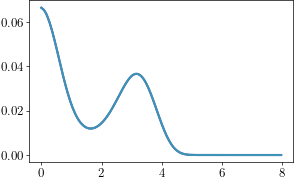

In [8]:
f2 = open('../data/pimc/CsR8/radial-u-reduce.dat','r')
lines = f2.readlines()
u = np.array([])
N = np.array([])
delN = np.array([])

readindex = 0
rval = len(lines) - 2

for line in lines:
    if(readindex == 0):
        p = line.split()
        for j in range(1,len(p)):
            if (j % 3 == 0):
                u = np.append(u,float(p[j]))
        r = np.zeros((len(u),rval))
        rho = np.zeros((len(u),rval))
        delrho = np.zeros((len(u),rval))
    elif(readindex == 1):
        print("Skip line")
    else:
        #print(r)
        p = line.split()
        #print(p)
        #print(readindex)
        ind_arr = 3*np.arange(0,int(len(p)/3),1)
        for j in ind_arr:
            ind = int(j/3)
            r[ind,readindex - 2] = p[j]
            #print(p[j+1])
            rho[ind,readindex - 2] = p[j+1]
            delrho[ind,readindex - 2] = p[j+2] 
        #print(rho)
    readindex = readindex + 1
f2.close()
#u = u[108:]
#rho = rho[108:,]
minRval = 1.4
print(minRval)
rho1d = np.array([])
for i in range(len(u)):
    indx = r[i,:] < minRval
    rho1d = np.append(rho1d,2*np.pi*intgr.simpson(y = r[i,indx]*rho[i,indx], x = r[i,indx]))
print(u)
u = u[108:]
rho1d = rho1d[108:]
f2 = open('../data/pimc/CsR8/radial-u-reduce2.dat','r')
lines = f2.readlines()
upr = np.array([])
readindex = 0
rval = len(lines) - 2

for line in lines:
    if(readindex == 0):
        p = line.split()
        for j in range(1,len(p)):
            if (j % 3 == 0):
                u = np.append(u,float(p[j]))
                upr = np.append(upr,float(p[j]))
        r = np.zeros((len(upr),rval))
        rho = np.zeros((len(upr),rval))
        delrho = np.zeros((len(upr),rval))
    elif(readindex == 1):
        print("Skip line")
    else:
        #print(r)
        p = line.split()
        #print(p)
        #print(readindex)
        ind_arr = 3*np.arange(0,int(len(p)/3),1)
        for j in ind_arr:
            ind = int(j/3)
            r[ind,readindex - 2] = p[j]
            #print(p[j+1])
            rho[ind,readindex - 2] = p[j+1]
            delrho[ind,readindex - 2] = p[j+2] 
        #print(rho)
    readindex = readindex + 1
f2.close()
#print(u)
plt.plot(r[len(upr)-10,:],rho[len(upr)-10,:])
refR = len(upr)-10
#print(rho[refR,:])
#minR = np.argmin(rho[refR,:])
#minRval = r[refR,minR]
minRval = 1.4
print(minRval)
for i in range(len(upr)):
    indx = r[i,:] < minRval
    rho1d = np.append(rho1d,2*np.pi*intgr.simpson(y = r[i,indx]*rho[i,indx], x = r[i,indx]))
print(rho1d)
sind = np.argsort(u,stable=True)
uCs = u[sind]
print(uCs)
rho1dCs2 = rho1d[sind]
#rhostar = max(rho1dCs)
#rho1dCs = rho1dCs/rhostar
PCs2 = hel.pressure(uCs,2)
PCsmax = max(PCs2)
PCsmin = min(PCs2)
PCsPlot2 = (PCs2 - PCsmin)/PCsmax
plt.plot(r[refR,:],rho[refR,:])

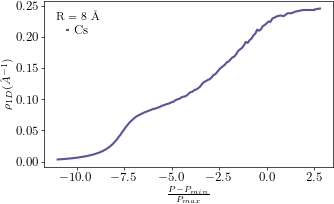

In [9]:
figsize = plt.rcParams['figure.figsize']
fig,ax = plt.subplots(figsize=(figsize[0],figsize[1]), constrained_layout=True)
ax.plot(uCs,rho1dCs2,label=r'Cs',color='#5E4FA2')
#ax.semilogx(PCsPlot,rho1dCs,label=r'Cs',color='#5E4FA2')
#ax.semilogx(PMgPlot,rho1dMg,label=r'Mg',color='#79C9A4')
#ax.semilogx(PArPlot,rho1dAr,label=r'Ar',color='#D7414E')
#ax.set_ylabel(r'$\frac{\rho_{1D}}{\rho_{1D}*}$')
ax.set_xlabel(r'$\frac{P - P_{min}}{P_{max}}$')
#ax.set_xlim(1,1)
ax.set_ylabel(r'$\rho_{1D} (Å^{-1})$')
#ax.set_xlabel(r'$P$')
plt.legend(title="R = 8 Å")
plt.savefig('R8rho1d.pdf')